In [1]:
import pandas as pd

In [2]:
import geopandas as gp

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
midterm = pd.read_csv('finalproj/alldata.csv')

In [5]:
midterm

,Unnamed: 0,City,Total_Days,Poor_Days,AQI_Median,Zone,Total_Days10,Poor_Days10,AQI_Median10,scale,pdayrate
0,0,Seattle,306,14,42.0,west,365,3,41,0.838356,16
1,1,San Francisco,314,22,45.0,west,365,14,48,0.860274,25
2,2,Los Angeles,275,119,81.0,west,365,115,77,0.753425,157
3,3,Denver,366,34,58.0,mountain,365,38,61,1.002740,33
4,4,Salt Lake City,366,21,50.0,mountain,365,24,51,1.002740,20
5,5,Phoenix,366,70,75.0,mountain,365,59,74,1.002740,69
6,6,Chicago,366,28,56.0,central,365,43,71,1.002740,27
7,7,St. Louis,366,10,52.0,central,365,103,74,1.002740,9
8,8,Dallas,306,24,49.0,central,365,28,52,0.838356,28
9,9,Boston,306,0,42.0,east,365,10,47,0.838356,0


In [6]:
midterm['lon'] = [-122.33, -122.42, -118.24, -104.99, -111.89, -112.07, -87.62, -90.19, -96.79, -71.05, -77.03, -80.19, -72.58, -71.41, -88.41, -87.78, -105.27, -105.08, -123.81, -122.47]
midterm['lat'] = [47.60, 37.79, 34.05, 39.73, 40.76, 33.44, 41.87, 38.62, 32.77, 42.36, 38.90, 25.76, 42.10, 41.82, 44.26, 42.72, 40.01, 40.58, 46.97, 48.75]

In [7]:
midterm

,Unnamed: 0,City,Total_Days,Poor_Days,AQI_Median,Zone,Total_Days10,Poor_Days10,AQI_Median10,scale,pdayrate,lon,lat
0,0,Seattle,306,14,42.0,west,365,3,41,0.838356,16,-122.33,47.60
1,1,San Francisco,314,22,45.0,west,365,14,48,0.860274,25,-122.42,37.79
2,2,Los Angeles,275,119,81.0,west,365,115,77,0.753425,157,-118.24,34.05
3,3,Denver,366,34,58.0,mountain,365,38,61,1.002740,33,-104.99,39.73
4,4,Salt Lake City,366,21,50.0,mountain,365,24,51,1.002740,20,-111.89,40.76
5,5,Phoenix,366,70,75.0,mountain,365,59,74,1.002740,69,-112.07,33.44
6,6,Chicago,366,28,56.0,central,365,43,71,1.002740,27,-87.62,41.87
7,7,St. Louis,366,10,52.0,central,365,103,74,1.002740,9,-90.19,38.62
8,8,Dallas,306,24,49.0,central,365,28,52,0.838356,28,-96.79,32.77
9,9,Boston,306,0,42.0,east,365,10,47,0.838356,0,-71.05,42.36


In [8]:
cities = gp.GeoDataFrame(midterm, geometry = gp.points_from_xy(midterm.lon,midterm.lat))
cities.geometry

0     POINT (-122.33000 47.60000)
1     POINT (-122.42000 37.79000)
2     POINT (-118.24000 34.05000)
3     POINT (-104.99000 39.73000)
4     POINT (-111.89000 40.76000)
5     POINT (-112.07000 33.44000)
6      POINT (-87.62000 41.87000)
7      POINT (-90.19000 38.62000)
8      POINT (-96.79000 32.77000)
9      POINT (-71.05000 42.36000)
10     POINT (-77.03000 38.90000)
11     POINT (-80.19000 25.76000)
12     POINT (-72.58000 42.10000)
13     POINT (-71.41000 41.82000)
14     POINT (-88.41000 44.26000)
15     POINT (-87.78000 42.72000)
16    POINT (-105.27000 40.01000)
17    POINT (-105.08000 40.58000)
18    POINT (-123.81000 46.97000)
19    POINT (-122.47000 48.75000)
Name: geometry, dtype: geometry

In [9]:
cities

,Unnamed: 0,City,Total_Days,Poor_Days,AQI_Median,Zone,Total_Days10,Poor_Days10,AQI_Median10,scale,pdayrate,lon,lat,geometry
0,0,Seattle,306,14,42.0,west,365,3,41,0.838356,16,-122.33,47.60,POINT (-122.33000 47.60000)
1,1,San Francisco,314,22,45.0,west,365,14,48,0.860274,25,-122.42,37.79,POINT (-122.42000 37.79000)
2,2,Los Angeles,275,119,81.0,west,365,115,77,0.753425,157,-118.24,34.05,POINT (-118.24000 34.05000)
3,3,Denver,366,34,58.0,mountain,365,38,61,1.002740,33,-104.99,39.73,POINT (-104.99000 39.73000)
4,4,Salt Lake City,366,21,50.0,mountain,365,24,51,1.002740,20,-111.89,40.76,POINT (-111.89000 40.76000)
5,5,Phoenix,366,70,75.0,mountain,365,59,74,1.002740,69,-112.07,33.44,POINT (-112.07000 33.44000)
6,6,Chicago,366,28,56.0,central,365,43,71,1.002740,27,-87.62,41.87,POINT (-87.62000 41.87000)
7,7,St. Louis,366,10,52.0,central,365,103,74,1.002740,9,-90.19,38.62,POINT (-90.19000 38.62000)
8,8,Dallas,306,24,49.0,central,365,28,52,0.838356,28,-96.79,32.77,POINT (-96.79000 32.77000)
9,9,Boston,306,0,42.0,east,365,10,47,0.838356,0,-71.05,42.36,POINT (-71.05000 42.36000)


In [10]:
filepath = 'finalproj/states.shp'
states = gp.read_file(filepath)

In [11]:
states.head()

,STATE_NAME,POP2000,Shape_Leng,Shape_Area,geometry
0,Hawaii,1211537,1.275836e+06,1.651300e+10,"MULTIPOLYGON (((-6020138.539 218107.445, -6019..."
1,Washington,5894121,3.004175e+06,1.644423e+11,"MULTIPOLYGON (((-1827831.410 1181178.165, -183..."
2,Montana,902195,2.859079e+06,3.596622e+11,"POLYGON ((-1147669.153 620212.891, -1148266.52..."
3,Maine,1274923,1.804888e+06,7.838479e+10,"MULTIPOLYGON (((1946992.125 735230.821, 194336..."
4,North Dakota,642200,1.753454e+06,1.730721e+11,"POLYGON ((-199316.434 662687.532, -219481.109 ..."


In [12]:
states = states.to_crs("epsg:4326") #Mercator-projection

In [13]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

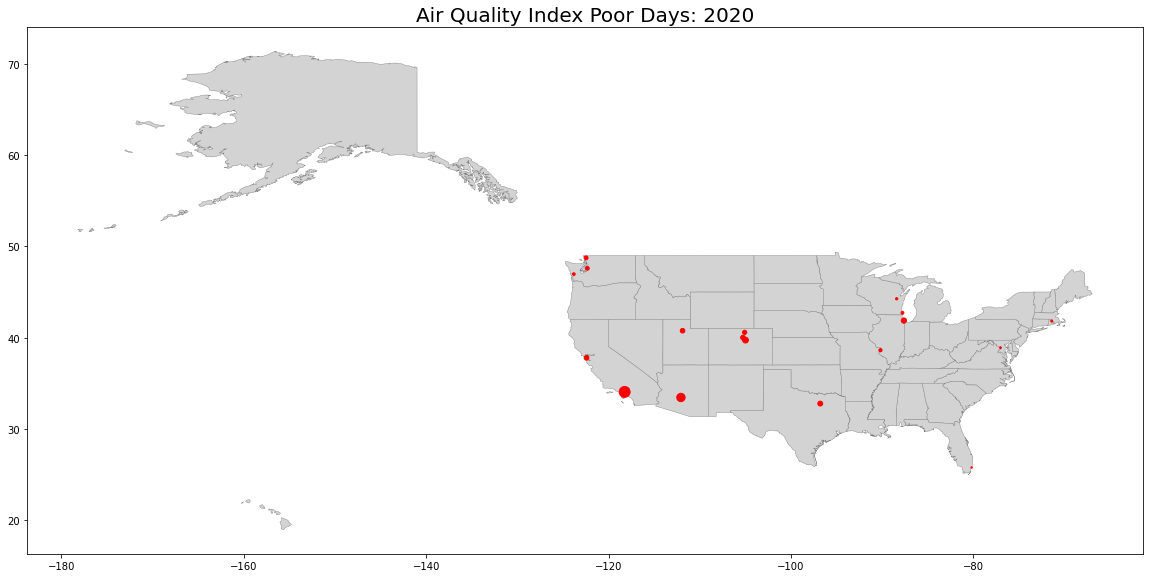

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
states.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4, legend= True)
cities.plot(ax=ax, color="red", markersize='Poor_Days', alpha=1.0, categorical=False, legend=True)
ax.axis()
plt.title('Air Quality Index Poor Days: 2020', size=20)
plt.axis()
plt.show()

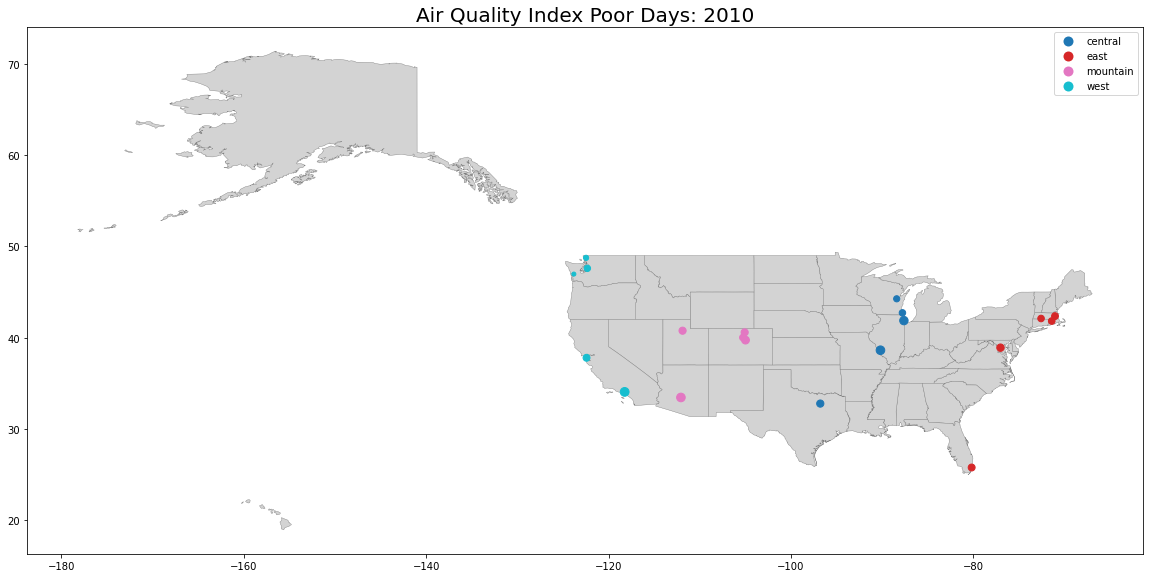

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
states.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4, legend= True)
cities.plot(column = 'Zone', ax=ax, markersize='AQI_Median10', alpha=1.0, categorical=False, legend = True)
ax.axis()
plt.title('Air Quality Index Poor Days: 2010', size=20)
#plt.savefig('maps2/Aqi2010.png')
plt.axis()
plt.show()

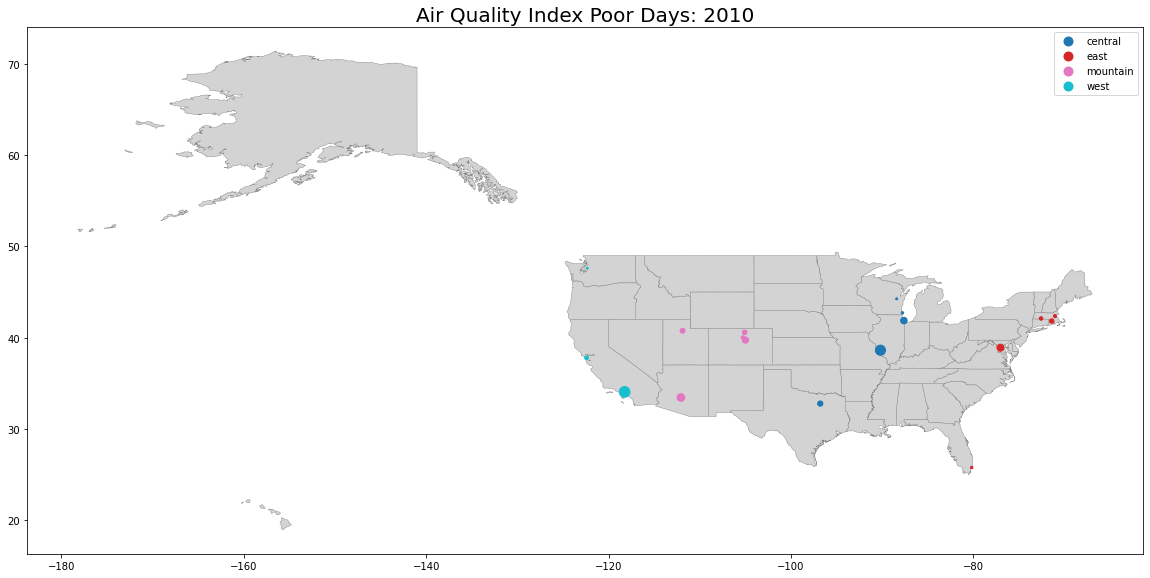

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
states.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4, legend= True)
cities.plot(column = 'Zone', ax=ax, markersize='Poor_Days10', alpha=1.0, categorical=False, legend = True)
ax.axis()
plt.title('Air Quality Index Poor Days: 2010', size=20)
plt.savefig('finalproj/Aqi2010.png')
#plt.axis()
#plt.show()

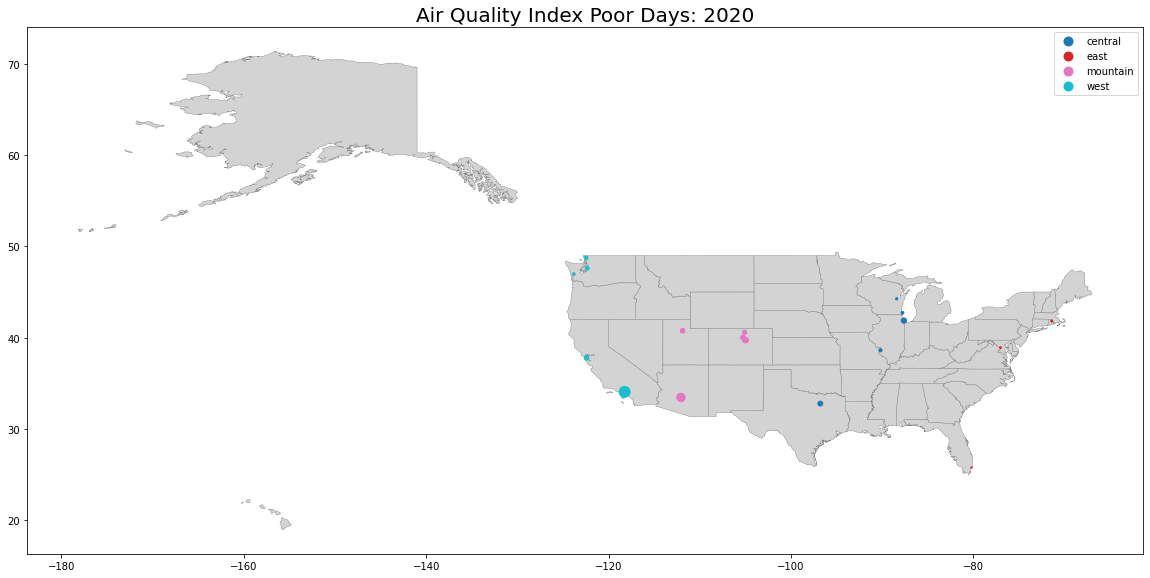

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
states.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4, legend= True)
cities.plot(column = 'Zone', ax=ax, markersize='Poor_Days', alpha=1.0, categorical=False, legend = True)
ax.axis()
plt.title('Air Quality Index Poor Days: 2020', size=20)
plt.savefig('finalproj/Aqi2020.png')
#plt.axis()
#plt.show()

In [18]:
import folium

In [19]:
m = folium.Map(location=[34,-100], tiles="OpenStreetMap", zoom_start=4)

In [20]:
m

In [21]:
import folium 

for i in range(0,len(cities)):
    folium.Circle(
        location=[cities.iloc[i]['lat'], cities.iloc[i]['lon']],
        popup=cities.iloc[i]['City'],
        radius=float(cities.iloc[i]['Poor_Days'])*2000,
        color='red',
        fill=True,
        fill_color='red'
     ).add_to(m)

In [22]:
m

In [23]:
m.save('finalproj/aqidata2020.html')

In [26]:
m = folium.Map(location=[34,-100], tiles="OpenStreetMap", zoom_start=4)
m

In [28]:
for i in range(0,len(cities)):
    folium.Circle(
        location=[cities.iloc[i]['lat'], cities.iloc[i]['lon']],
        popup=cities.iloc[i]['City'],
        radius=float(cities.iloc[i]['Poor_Days10'])*2000,
        color='red',
        fill=True,
        fill_color='red'
     ).add_to(m)
m

In [29]:
m.save('finalproj//aqidata2010.html')